In [12]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

In [13]:
DEUmonthyearAc2 = pd.read_csv('queries_results/DEU/DEU monthyear ac2 count.csv', header = 0,sep=' *, *')
DEUmonthyearAc2["Time"]=pd.to_datetime(DEUmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

DEUPOLmonthyearERC = pd.read_csv('queries_results/DEU/DEU_POL/DEU-POL monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
DEUPOLmonthyearERC["Time"]=pd.to_datetime(DEUPOLmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
DEUUSAmonthyearERC = DEUPOLmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

s = DEUPOLmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
t = DEUmonthyearAc2.groupby(["Time"]).agg({'Count':'sum'})
s['Count']=s['Count']/t['Count']*100
s['Connection']='DEU-POL'

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifyi

In [14]:
POLmonthyearAc2 = pd.read_csv('queries_results/Poland/POL monthyear ac2 count.csv', header = 0,sep=' *, *')
POLmonthyearAc2["Time"]=pd.to_datetime(POLmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

POLmonthyearERC = pd.read_csv('queries_results/Poland/POL_DEU/POL-DEU monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
POLmonthyearERC["Time"]=pd.to_datetime(POLmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
POLmonthyearERC = POLmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

u = POLmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
t = POLmonthyearAc2.groupby(["Time"]).agg({'Count':'sum'})
u['Count']=u['Count']/t['Count']*100
u['Connection']='POL-DEU'

s = s.append(u)

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifyi

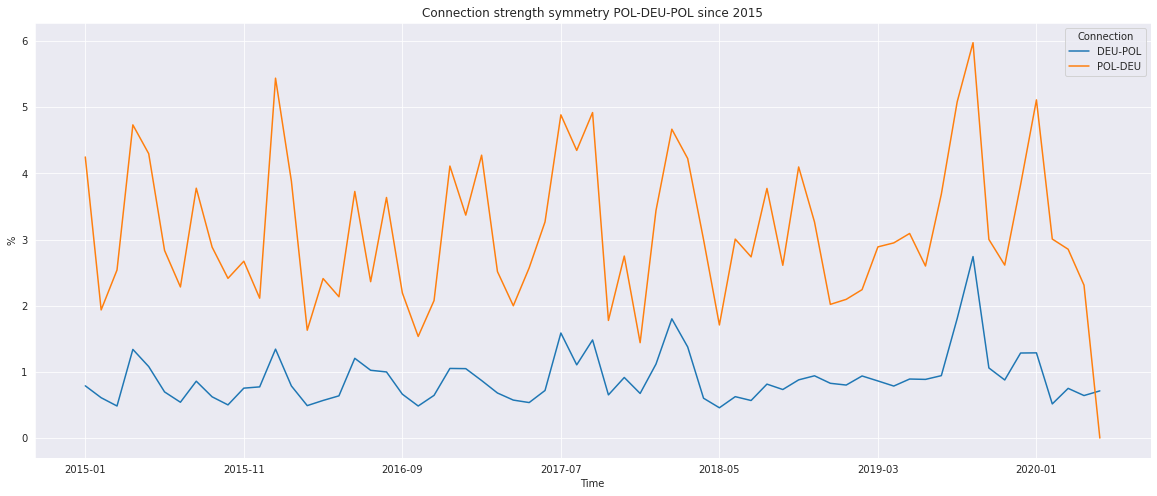

In [16]:
s = s.groupby(["Time","Connection"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g
g.set(ylabel='%')
g.set_title("Connection strength symmetry POL-DEU-POL since 2015")
g.figure.set_size_inches(20,8)